# **Mengimport dataset**

In this step, the dataset is being imported by stating where we put the source image, then divide those image into training and validation folder. Here is the guide about what the variable states (change it according to your directory):

base_dir -> the main directory which consist of 3 folder (bahan, latih, and validasi)

bahan_dir->states the directory of folder bahan

train_dir->states the directory of folder latih

validation->states the directory of folder validasi



In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
base_dir= '/content/drive/MyDrive/alexresing/3_klasifikasi'
!ls "/content/drive/MyDrive/alexresing/3_klasifikasi"

bahan  latih  validasi


In [ ]:
bahan_dir =os.path.join(base_dir,'bahan')
train_dir =os.path.join(base_dir,'latih')
validation_dir =os.path.join(base_dir,'validasi')

to be changed according to your own directory

normal_dir-> states the directory of images dataset of normal cell as the 1st class of classification

dysplastic_dir->states the directory of images dataset of dysplastic cell as the 2nd class of classification

train_normal->states the directory of train folder of the 1st class. leave it empty first because it will get filled in the next steps

train_dysplastic->states the directory of train folder of the 2nd class. leave it empty first because it will get filled in the next steps

validation_normal->states the directory of validation folder of the 1st class. leave it empty first because it will get filled in the next steps

validation_normal->states the directory of validation folder of the 2nd class. leave it empty first because it will get filled in the next steps

In [ ]:
#direktori bahan
normal_dir=os.path.join(bahan_dir, 'normal/')
dysplastic_dir=os.path.join(bahan_dir,'dysplastic/')
carcinoma_dir=os.path.join(bahan_dir,'carcinoma/')

print('jumlah data train tiap kelas')
print('jumlah data 1:', len(os.listdir(normal_dir)))
print('jumlah data 2:', len(os.listdir(dysplastic_dir)))
print('jumlah data 3:', len(os.listdir(carcinoma_dir)))

#direktori train
train_normal= os.path.join(train_dir,'normal/')
train_dysplastic=os.path.join(train_dir,'dysplastic/')
train_carcinoma=os.path.join(train_dir,'carcinoma/')
#direktori validation
validation_normal= os.path.join(validation_dir,'normal/')
validation_dysplastic=os.path.join(validation_dir,'dysplastic/')
validation_carcinoma=os.path.join(validation_dir,'carcinoma/')

jumlah data train tiap kelas
jumlah data 1: 144
jumlah data 2: 198
jumlah data 3: 150


# **Prepare the dataset**

In this steps, the dataset is being prepared by going through several process such as randomize, generation of new data, etc

.

things to change:

train_ratio: set the ratio of the train and validation data. example: if you have 100 images in dataset and you set the ratio to 0.8, there will be 80 images used for training and 20 images used for testing

source_number(e.g 01,02,...)-> use the directory of one of the class in the dataset (bahan) folder

train__number(e.g 01,02,...)-> use the directory of one of the class in training (latih) folder

validation_number(e.g 01,02,...)-> use the directory of one of the class in the testing (validasi) folder

# *NOTE!!! ->don't run this section if you have divided the data into training and validation. Otherwise the file inside will get duplicate*

In [ ]:
import random
from shutil import copyfile

def train_val_split(source,train,val,train_ratio):
  total_size=len(os.listdir(source))
  train_size=int(train_ratio * total_size)
  val_size=(total_size - train_size )

  randomized=random.sample(os.listdir(source),total_size)
  train_files=randomized[0:train_size]
  val_files=randomized[train_size:total_size]

  for i in train_files:
    i_file=source+i
    destination=train+i
    copyfile(i_file, destination)
  for i in val_files:
    i_file=source+i
    destination=val+i
    copyfile(i_file, destination)
  
#rasio data train dan test
train_ratio=0.8
  
#normal
source_00=normal_dir
train_00=train_normal
val_00=validation_normal
train_val_split(source_00,train_00,val_00,train_ratio)
#dysplastic
source_01=dysplastic_dir
train_01=train_dysplastic
val_01=validation_dysplastic
train_val_split(source_01,train_01,val_01,train_ratio)
#carcinoma
source_03=carcinoma_dir
train_03=train_carcinoma
val_03=validation_carcinoma
train_val_split(source_03,train_03,val_03,train_ratio)

# You can directly run this section if the data has already divided into training and testing

In [ ]:
print('jumlah all normal: ',len(os.listdir(normal_dir)))
print('jumlah train normal: ',len(os.listdir(train_normal)))
print('jumlah validation normal: ',len(os.listdir(validation_normal)))

print('\njumlah all normal: ',len(os.listdir(dysplastic_dir)))
print('jumlah train normal: ',len(os.listdir(train_dysplastic)))
print('jumlah validation normal: ',len(os.listdir(validation_dysplastic)))

print('\njumlah all carcinoma: ',len(os.listdir(carcinoma_dir)))
print('jumlah train carcinoma: ',len(os.listdir(train_carcinoma)))
print('jumlah validation carcinoma: ',len(os.listdir(validation_carcinoma)))

jumlah all normal:  144
jumlah train normal:  115
jumlah validation normal:  29

jumlah all normal:  198
jumlah train normal:  158
jumlah validation normal:  40

jumlah all carcinoma:  150
jumlah train carcinoma:  120
jumlah validation carcinoma:  30


**Preprocessing**

In this section, new data is being generated in train_datagen and val_datagen using the criteria inside the ImageDataGenerator()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    shear_range=0.1,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1
    
)
val_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    shear_range=0.1,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1

)

note: make sure that the target_size is equal as the input_size in the next section

In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(227,227),
    batch_size=128,
    class_mode='categorical'
)
val_generator=val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227,227),
    batch_size=128,
    class_mode ='categorical'
)

Found 392 images belonging to 3 classes.
Found 99 images belonging to 3 classes.


In [ ]:
type(train_generator)
type(train_datagen)

print("Batch Size for Input Image : ",train_generator[0][0].shape)
print("Batch Size for Output Image : ",train_generator[0][1].shape)
print("Image Size of first image : ",train_generator[0][0][0].shape)
print("Output of first image : ",train_generator[0][1][0].shape)

Batch Size for Input Image :  (128, 227, 227, 3)
Batch Size for Output Image :  (128, 3)
Image Size of first image :  (227, 227, 3)
Output of first image :  (3,)


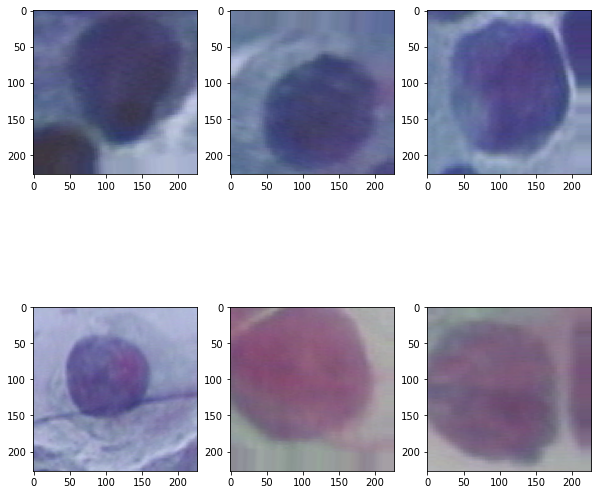

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train_generator[0][0][12])
axs[0][1].imshow(train_generator[0][0][10])
axs[0][2].imshow(train_generator[0][0][5])
axs[1][0].imshow(train_generator[0][0][20])
axs[1][1].imshow(train_generator[0][0][25])
axs[1][2].imshow(train_generator[0][0][3])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.95):
      print('\nAkurasi mencapai 95%')
      self.model.stop_training=True

callbacks = myCallback()

# **TRAINING**

you can customize your own architecture by adding or removing layer, change the parameters such as the activation function, padding,etc. In this code, I use the alexnet architecture showed in this diagram
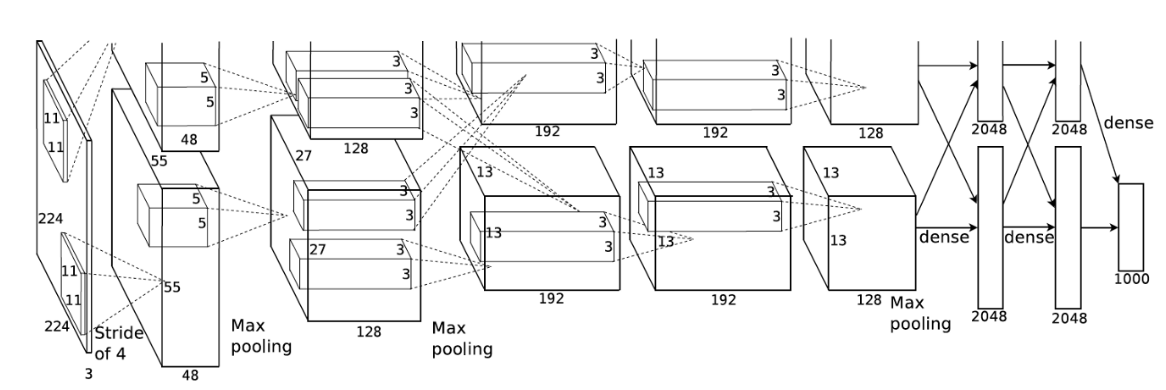

Note: make sure that input_shape is equal as target_size in the previous value and the last layer_dense equal to number of class

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
input_shape=(227,227,3)


def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(3,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [ ]:
alex = AlexNet(train_generator[0][0].shape[1:])

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history=alex.fit(train_generator,
         #steps_per_epoch=12, #-->dimatikan karena sistem tidak kuat jadi menyesuaikan
         epochs=100,
         validation_data=val_generator,
         #validation_steps= 1,
         verbose=1,
         callbacks= [callbacks])

Epoch 1/100
4/4 [==============================] - 7s 2s/step - loss: 0.8356 - accuracy: 0.5995 - val_loss: 3.9554 - val_accuracy: 0.4040
Epoch 2/100
4/4 [==============================] - 7s 2s/step - loss: 0.8066 - accuracy: 0.5663 - val_loss: 2.8930 - val_accuracy: 0.3030
Epoch 3/100
4/4 [==============================] - 6s 1s/step - loss: 0.8157 - accuracy: 0.4923 - val_loss: 1.8694 - val_accuracy: 0.3939
Epoch 4/100
4/4 [==============================] - 6s 2s/step - loss: 0.8080 - accuracy: 0.5765 - val_loss: 2.6689 - val_accuracy: 0.4040
Epoch 5/100
4/4 [==============================] - 6s 1s/step - loss: 0.8049 - accuracy: 0.6071 - val_loss: 2.6277 - val_accuracy: 0.3939
Epoch 6/100
4/4 [==============================] - 6s 2s/step - loss: 0.6617 - accuracy: 0.6454 - val_loss: 4.4486 - val_accuracy: 0.4141
Epoch 7/100
4/4 [==============================] - 6s 1s/step - loss: 0.6699 - accuracy: 0.6760 - val_loss: 2.8342 - val_accuracy: 0.3636
Epoch 8/100
4/4 [=================

In [ ]:
val_generator=val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227,227),
    batch_size=128,
    class_mode ='categorical'
)

Found 99 images belonging to 3 classes.


In [ ]:
preds = alex.evaluate(val_generator)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 1s 1s/step - loss: 6.5417 - accuracy: 0.4343
Loss = 6.54165506362915
Test Accuracy = 0.4343434274196625


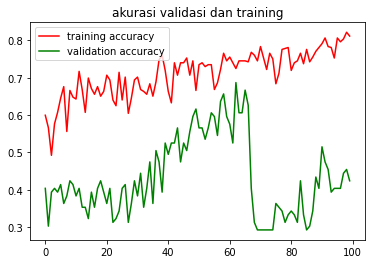

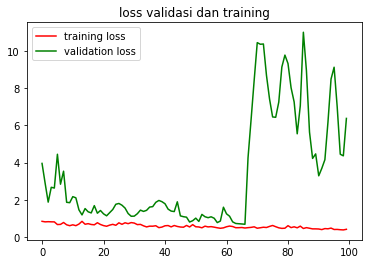

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='training accuracy')
plt.plot(epochs,val_acc,'g',label='validation accuracy')
plt.title('akurasi validasi dan training')
plt.legend(loc='best')
plt.show()

plt.plot(epochs,loss,'r',label='training loss')
plt.plot(epochs,val_loss,'g',label='validation loss')
plt.title('loss validasi dan training')
plt.legend(loc='best')
plt.show()

# **Lets Classify!!**

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
class_list=os.listdir(train_dir)
print('Data dapat dikelompokan menjadi: ', class_list)
uploaded=files.upload()


Data dapat dikelompokan menjadi:  ['dysplastic', 'normal', 'carcinoma']


Saving 157181671-157181686-001.BMP to 157181671-157181686-001.BMP


Found 1 images belonging to 2 classes.
[9.2906548e-20 1.3574893e-16 1.0000000e+00]
Ini adalah gambar carcinoma dengan persentase keyakinan 57.61
carcinoma


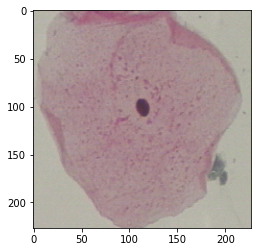

In [ ]:
#untuk gambar upload
prediksi='/content/classify/'
predict_datagen=ImageDataGenerator(rescale=1./255)
predict=predict_datagen.flow_from_directory(
    prediksi,
    target_size=(227,227),
    batch_size=1,
    class_mode='categorical'
)

image_num=0
predictions = alex.predict(predict)
imshow(predict[image_num][0][0])
print(predictions[image_num])

nilai = tf.nn.softmax(predictions[image_num])

print(
      "Ini adalah gambar {} dengan persentase keyakinan {:.2f}"
      .format(class_list[np.argmax(nilai)], 100 * np.max(nilai))
      )
print(class_list[np.argmax(nilai)])


note: for 'prediksi' folder make sure that we place the image inside 1 folder first, so the system will read there is some images in 1 classes

Found 29 images belonging to 1 classes.
[9.2906548e-20 1.3574893e-16 1.0000000e+00]
Ini adalah gambar carcinoma dengan persentase keyakinan 57.61


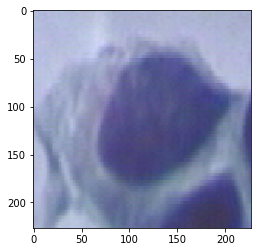

In [ ]:
#untuk gambar lain
prediksi='/content/drive/MyDrive/alexresing/ujian/'
predict_datagen=ImageDataGenerator(rescale=1./255)
predict=predict_datagen.flow_from_directory(
    prediksi,
    target_size=(227,227),
    batch_size=1,
    class_mode='categorical'
)


image_num=8
predictions = alex.predict(predict)
imshow(predict[image_num][0][0])
print(predictions[image_num])

nilai = tf.nn.softmax(predictions[image_num])

print(
      "Ini adalah gambar {} dengan persentase keyakinan {:.2f}"
      .format(class_list[np.argmax(nilai)], 100 * np.max(nilai))
      )

In [ ]:
# gambar1
nilai_pred1=tf.nn.softmax(predictions[13])
pred1=class_list[np.argmax(nilai_pred1)]
perstage1=100 * np.max(nilai_pred1)
judul1="{}  {:.2f}%".format(class_list[np.argmax(nilai_pred1)], 100 * np.max(nilai_pred1))
#gambar2
nilai_pred2=tf.nn.softmax(predictions[10])
pred2=class_list[np.argmax(nilai_pred2)]
perstage2=100 * np.max(nilai_pred2)
judul2="{}  {:.2f}%".format(class_list[np.argmax(nilai_pred2)], 100 * np.max(nilai_pred2))
#gambar3
nilai_pred3=tf.nn.softmax(predictions[5])
pred3=class_list[np.argmax(nilai_pred3)]
perstage3=100 * np.max(nilai_pred3)
judul3="{}  {:.2f}%".format(class_list[np.argmax(nilai_pred3)], 100 * np.max(nilai_pred3))
#gambar4
nilai_pred4=tf.nn.softmax(predictions[18])
pred4=class_list[np.argmax(nilai_pred4)]
perstage4=100 * np.max(nilai_pred4)
judul4="{}  {:.2f}%".format(class_list[np.argmax(nilai_pred4)], 100 * np.max(nilai_pred4))
#gambar5
nilai_pred5=tf.nn.softmax(predictions[7])
pred5=class_list[np.argmax(nilai_pred5)]
perstage5=100 * np.max(nilai_pred5)
judul5="{}  {:.2f}%".format(class_list[np.argmax(nilai_pred5)], 100 * np.max(nilai_pred5))
#gambar6
nilai_pred6=tf.nn.softmax(predictions[6])
pred6=class_list[np.argmax(nilai_pred6)]
perstage6=100 * np.max(nilai_pred6)
judul6="{}  {:.2f}%".format(class_list[np.argmax(nilai_pred6)], 100 * np.max(nilai_pred6))

#def get_category(predicted_output):
#  class_list
#  return os.listdir(train_dir)[np.argmax(abc)]
#-somehow fuction above can be used to shortening this part

Text(0.5, 1.0, 'carcinoma  57.61%')

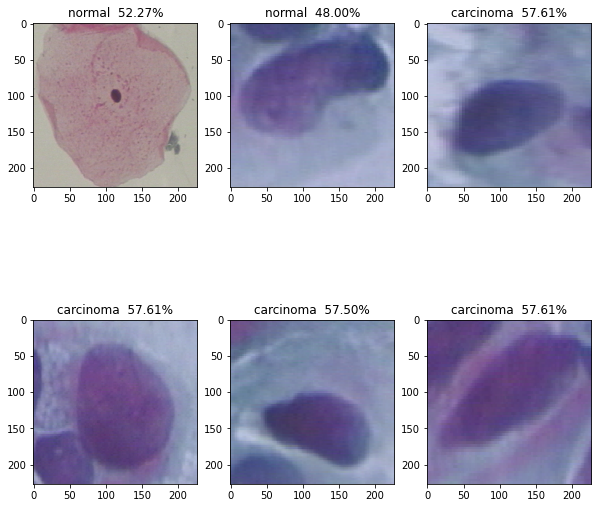

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(predict[13][0][0])
axs[0][0].set_title(judul1)

axs[0][1].imshow(predict[10][0][0])
axs[0][1].set_title(judul2)

axs[0][2].imshow(predict[5][0][0])
axs[0][2].set_title(judul3)

axs[1][0].imshow(predict[18][0][0])
axs[1][0].set_title(judul4)

axs[1][1].imshow(predict[7][0][0])
axs[1][1].set_title(judul5)

axs[1][2].imshow(predict[6][0][0])
axs[1][2].set_title(judul6)